In [ ]:
#Homework 5: Alexander Jenouri - RIN: 661959489

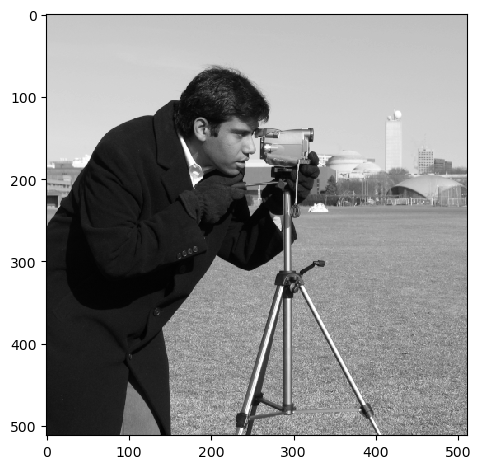

<function matplotlib.pyplot.show(close=None, block=None)>

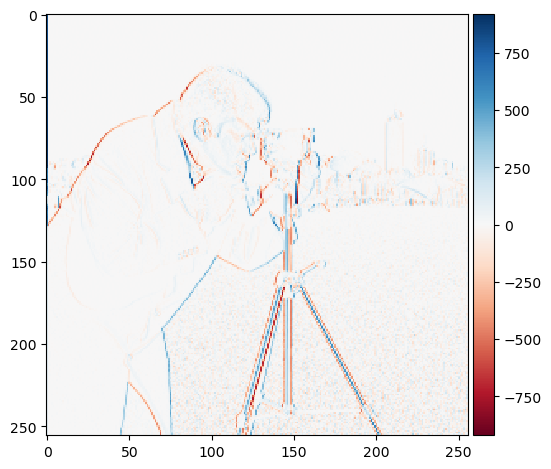

In [88]:
#Problem 1 =======================================================================================

import numpy as np
from skimage import data
import matplotlib.pyplot as plt

def my_filter(image, kernel, stride=(1,1), padding=(0,0)):
# Compute the shape of the output
    nx = ((image.shape[0] + 2*padding[0] - kernel.shape[0]) // stride[0]) + 1
    ny = ((image.shape[1] + 2*padding[1] - kernel.shape[1]) // stride[1]) + 1

# Pad the input image with zeros using np.pad()
    
    pad_image = np.pad(image, padding[0], mode='constant')
    
# Initialize the output array
    
    output = np.zeros((nx,ny))

# Perform the convolution operation by sliding the kernel across the image
    
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            x = i*stride[0]
            y = j*stride[1]
            
            cut_image = pad_image[x:x+3,y:y+3]
            output[i,j] = (np.multiply(cut_image, kernel)).sum()
            
    return output

image = data.camera()
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filtered_img = my_filter(image, kernel, stride=(2,2), padding=(1,1))

from skimage import io #I only imported this for the visual confirmation
io.imshow(image)
plt.show()

io.imshow(filtered_img)
plt.show

In [62]:
#Problem 2 =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

#Import Data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Normalize
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#Convolution
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(Flatten())

#Neural Network
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
                                                                                                                 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
                                                                                                                 
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.3)                                                                                                         

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

In [87]:
#Problem 3 ===============================================================================

import numpy as np
import pandas as pd
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_breast_cancer(as_frame = True)
df_data = pd.DataFrame(data=data.data, columns=data.feature_names)
df_data = df_data[["worst compactness", "worst concavity", "worst area"]]
df_target = pd.DataFrame(data=data.target)

X_train, X_test, y_train, y_test=train_test_split(
    df_data,df_target,
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=df_target)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

#Linear SVM Model
model = svm.SVC(kernel='linear', C=1, gamma='auto')
model.fit(X_train, y_train)
linear_predictions = model.predict(X_test)

linear_acc = accuracy_score(y_test, linear_predictions)
print("The Accuracy of the linear SVM model is {}".format(linear_acc))

#RBF SVM Model
model = svm.SVC(kernel='rbf', C=2, gamma='auto')
model.fit(X_train, y_train)
rbf_predictions = model.predict(X_test)

rbf_acc = accuracy_score(y_test, rbf_predictions)
print("The Accuracy of the RBF SVM Model with C=2 is {}".format(rbf_acc))

The Accuracy of the linear SVM model is 0.9590643274853801
The Accuracy of the RBF SVM Model with C=2 is 0.7309941520467836
